<a href="https://colab.research.google.com/github/imaboylol/itmo-advanced-ml-and-dl/blob/main/classification-dt/DT_Banking_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация при помощи DT

# Описание набора данных

В этой лабораторной работе мы рассмотрим разные подходы к задаче классификации, в частности, деревья принятия решений, а также поговорим о том, как бороться с несбалансированностью датасета.

Изучаемый нами набор данных — это набор данных о принятых предложениях по кредитам в банке **Thera-Bank**. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более 9,6%. Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

Набор данных содержит как информацию о клиенте, так и информацию о его реакции на кампанию предыдущего года:

*   **ID**: ID клиента

*   **Age**: Возраст (полных лет)

*   **Experience**: Стаж

*   **Income**: Годовой доход (в тысячах)

*   **ZIP Code**: Индекс места проживания

*   **Family**: Количество членов семьи

*   **CCAvg**: Средние траты в месяц по кредитной карте (в тысячах)

*   **Education**: Уровень образования (1: бакалавр, 2: магистр, 3: что-то большее)

*   **Mortgage**: Стоимость ипотеки, если имеется (в тысячах)

*   **Securities Account**: Наличие счета в ценных бумагах

*   **CD Account**: Наличие сертификата на депозит

*   **Online**: Использует ли клиент интернет-банкинг

*   **CreditCard**: Использует ли клиент кредитную карту, выпущенную данным банком

*   **Personal Loan**: Принял ли клиент персональное предложение по кредиту (целевая переменная)

# Разведочный анализ данных

### imports

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

Считайте набор данных в датафрейм

In [45]:
# < ENTER YOUR CODE HERE >
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')

При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [46]:
# < ENTER YOUR CODE HERE >
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Набор данных содержит 14 переменных, 1 из которых является целевой.

1 номинальная переменная: **ID**

5 числовых переменных: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 категориальные переменных: **Family**, **Education**, **ZIP Code**

5 булевых переменных: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

Пропущенных значений нет.

Experience содержит какие-то отрицательные значения

Удалите колонку ID, она нам не понадобится

In [47]:
# < ENTER YOUR CODE HERE >
df = df.drop(['ID'], axis='columns')

Имеет смысл попробовать отловить каике-либо зависимости или их отсутствие.

Постройте матрицу корреляций

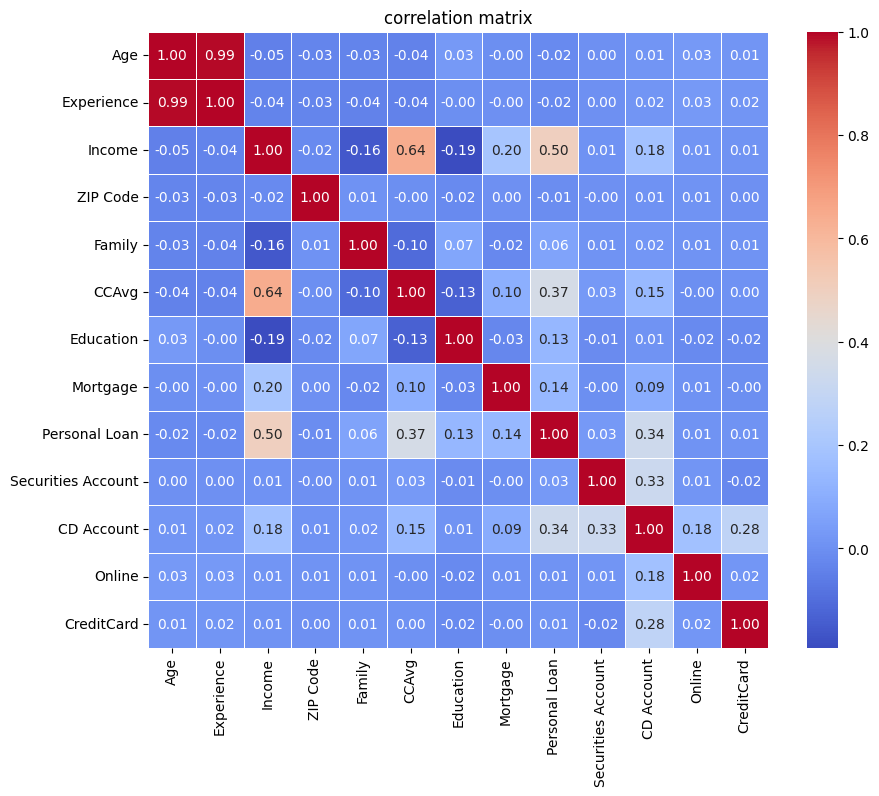

In [48]:
# < ENTER YOUR CODE HERE >
corr_matrix = df.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("correlation matrix")
plt.show()

Определите две наиболее коррелированных переменных

In [49]:
# Age, Experience

Определите признак, который меньше всего коррелирует (можно считать почти не коррелирует) с остальными признаками (в том числе с откликом). Удалите этот признак из рассмотрения.

Введите название удаленного признака.

In [50]:
# < ENTER YOUR CODE HERE >
# ZIP Code
df = df.drop(['ZIP Code'], axis='columns')

# Предварительная подготовка данных

## Модификация признаков

Стоит разобраться с полем <code>Experience</code>. Видно, что опыт коррелирует с возрастом. Однако, в поле <code>Experience</code> присутствуют отрицательные значения. Имеет смысл "сдвинуть" значения в этой колонке. Добавьте ко всем значениям колонки <code>Experience</code> одно число так, чтобы минимальное значение было равно $0$.

Вычислите выборочное среднее колонки <code>Experience</code> после преобразования.

In [51]:
# < ENTER YOUR CODE HERE >
min_experience = df['Experience'].min()
print(f"min 'Experience': {min_experience}")

# Добавляем ко всем значениям Experience абсолютное значение минимального элемента
df['Experience'] = df['Experience'] + abs(min_experience)

# Проверяем минимальное значение после изменения
new_min_experience = df['Experience'].min()
print(f"modified min 'Experience': {new_min_experience}")

# Вычисляем среднее значение обновленной колонки Experience
mean_experience = df['Experience'].mean()
print(f"mean modified 'Experience': {mean_experience}")

min 'Experience': -3
modified min 'Experience': 0
mean modified 'Experience': 23.19625


Аналогично имеет смысл модфицировать поле <code>CCAvg</code>. Раз рассматривается годовой доход, то имеет смысл и значения трат рассматривать в рамках года.

Вычислите выборочное среднее колонки <code>CCAvg</code> после преобразования.

In [52]:
# < ENTER YOUR CODE HERE >
df['CCAvg'] = df['CCAvg'] * 12

# Вычисляем среднее значение обновленной колонки Experience
mean_ccavg = df['CCAvg'].mean()
print(f"mean modified 'CCAvg': {mean_ccavg}")

mean modified 'CCAvg': 23.06166


## Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать <code>sns.boxplot()</code>. Определите признак по изображению boxplot из вашего варианта.

<Axes: ylabel='CCAvg'>

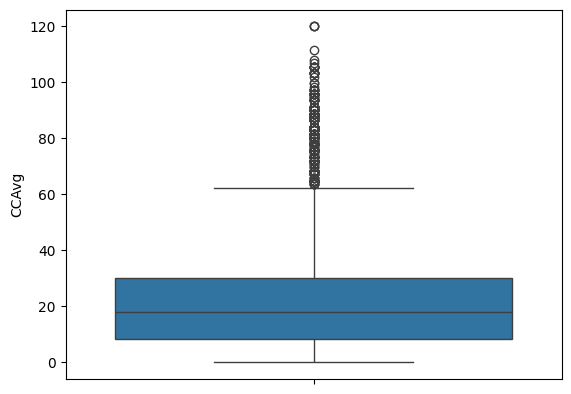

In [53]:
sns.boxplot(data=df['CCAvg'])

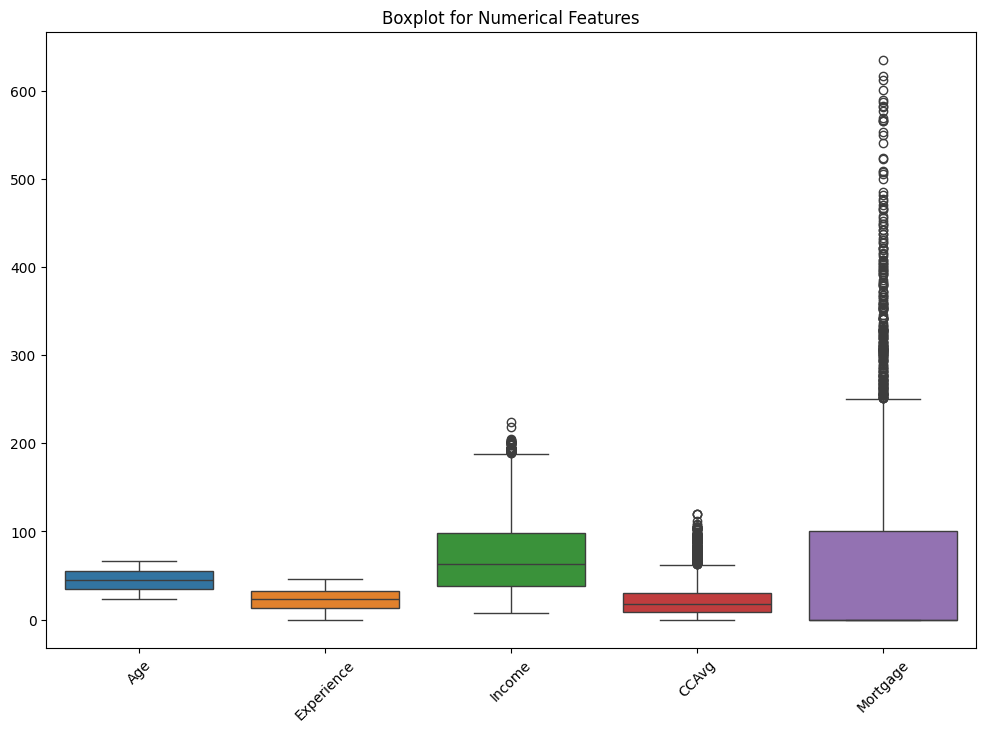

In [54]:
# < ENTER YOUR CODE HERE >
numerical_features = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

# Построение boxplot для всех числовых признаков
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features)
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

Определите признак, содержащий наибольшее число выбросов. Введите название этого признака.


In [ ]:
# Mortgage

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>.

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$.

In [77]:
z_scores = np.abs(zscore(df['Mortgage']))
outliers_count = (z_scores.abs() > 3).sum().sum()
outliers_count

83

Итак, выбросов не очень много, поэтому выбросите их из набора данных. Введите оставшееся в датасете число строк.

In [90]:
# < ENTER YOUR CODE HERE >
outliers = (z_scores.abs() > 3)

outliers = outliers.to_frame()
df_cleaned = df[~outliers.any(axis=1)]
print(f"Размер исходного датасета: {df.shape}")
print(f"Размер очищенного датасета: {df_cleaned.shape}")

Размер исходного датасета: (4000, 12)
Размер очищенного датасета: (3917, 12)


# Построение моделей

# Базовый алгоритм

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [91]:
# < ENTER YOUR CODE HERE >
X = df_cleaned.drop(columns=['Personal Loan'])
y = df_cleaned['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=df_cleaned['Personal Loan'])

Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [92]:
# < ENTER YOUR CODE HERE >
model_v1 = DecisionTreeClassifier(random_state=7, criterion='gini')
model_v1.fit(X_train, y_train)

y_pred = model_v1.predict(X_test)
f1 = f1_score(y_test, y_pred)

f1

0.8857142857142857

In [93]:
model_v2 = DecisionTreeClassifier(random_state=7, criterion='entropy')
model_v2.fit(X_train, y_train)

y_pred = model_v2.predict(X_test)
f1 = f1_score(y_test, y_pred)

f1

0.8840579710144928

## Учет дисбаланса соотношения классов

А теперь, если вспомнить, что выборка несбалансирована, то можно указать дополнительный параметр <code>class_weight</code>. Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [94]:
# < ENTER YOUR CODE HERE >
model_v3 = DecisionTreeClassifier(random_state=7, criterion='gini', class_weight='balanced')
model_v3.fit(X_train, y_train)

y_pred = model_v3.predict(X_test)
f1 = f1_score(y_test, y_pred)

f1

0.8676470588235294

In [95]:
model_v4 = DecisionTreeClassifier(random_state=7, criterion='entropy', class_weight='balanced')
model_v4.fit(X_train, y_train)

y_pred = model_v4.predict(X_test)
f1 = f1_score(y_test, y_pred)

f1

0.8652482269503546

## Upsampling обучающей выборки

Помимо очевидного присвоения весов несбалансированным классам, можно воспользоваться алгоритмом <code>SMOTE</code>. Ему на вход подаются экземпляры всех классов с их метками, а он в свою очередь пытается на их основе экстраполировать само распределение данных этого класса. После этого он сэмплирует новые объекты классов так, пока количество строк каждого класса не станет везде одинаковым.

Получается, что в таком случае будет получена сбалансированная выборка, и пропадет нужда как-то ухищряться с весами и прочим.

Определите долю элементов класса $0$ тренировочного набора данных.

In [96]:
# < ENTER YOUR CODE HERE >
class_0_count = (y_train == 0).sum()
total_count = len(y_train)

class_0_ratio = class_0_count / total_count

print(f"Доля элементов класса 0 в тренировочном наборе: {class_0_ratio:.4f}")

Доля элементов класса 0 в тренировочном наборе: 0.9113


Используя класс <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> из модуля <code>imblearn.over_sampling</code> сбалансируйте обучающую выборку с параметрами, указанными в вашем варианте.

In [99]:
# < ENTER YOUR CODE HERE >

smote = SMOTE(random_state=7)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

class_0_count = (y_train_resampled == 0).sum()
class_1_count = (y_train_resampled == 1).sum()

print(f"Количество объектов класса 0 после балансировки: {class_0_count}")
print(f"Количество объектов класса 1 после балансировки: {class_1_count}")

Количество объектов класса 0 после балансировки: 2855
Количество объектов класса 1 после балансировки: 2855


Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов. Введите количество объектов класса $1$.

Снова обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [100]:
# < ENTER YOUR CODE HERE >
model_v5 = DecisionTreeClassifier(random_state=7, criterion='gini')
model_v5.fit(X_train_resampled, y_train_resampled)

y_pred = model_v5.predict(X_test)
f1 = f1_score(y_test, y_pred)

f1

0.8129032258064516

In [101]:
model_v6 = DecisionTreeClassifier(random_state=7, criterion='entropy')
model_v6.fit(X_train_resampled, y_train_resampled)

y_pred = model_v6.predict(X_test)
f1 = f1_score(y_test, y_pred)

f1

0.8205128205128205